## Trajectory inference // scVELO

Author: Lieke L van de Haar (18112020)

__scVELO__

Bergen, V., Lange, M., Peidli, S. et al. Generalizing RNA velocity to transient cell states through dynamical modeling. Nat Biotechnol (2020). https://doi.org/10.1038/s41587-020-0591-3
    
For detailed information on scVELO: https://github.com/theislab/scvelo 

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import matplotlib as mpl
import matplotlib.pyplot as pl
from matplotlib import rcParams
from scipy.sparse import csr_matrix

rcParams['axes.grid'] = False

#settings
sc.settings.verbosity = 3
sc.logging.print_versions()
scv.logging.print_versions()
sc.settings.figdir = "../../figures/embryo_Hb/Seurat"
scv.settings.figdir = "../../figures/embryo_Hb/Seurat"
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.6 anndata==0.7.4 umap==0.3.10 numpy==1.19.2 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.0 louvain==0.6.1
scvelo==0.1.25  scanpy==1.4.6  anndata==0.7.4  loompy==3.0.6  numpy==1.19.2  scipy==1.4.1  matplotlib==3.3.2  sklearn==0.22.1  pandas==1.0.1  

## Import adata 

In [4]:
adata = sc.read_h5ad('../../data/output/embryo_Hb/Mar2020_embryo_Hb_Pou4f1_louvain_seurat.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 2773 × 2292
    obs: 'n_genes', 'plate', 'platebatch', 'stage', 'well_no', 'ERCC_genes', 'n_total_counts', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_protein_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'n_counts_norm', 'louvain'
    var: 'ENS_names', 'geneid', 'feature', 'chr', 'fullname', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca', 'plate_colors', 'stage_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [ ]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

The gene-specific velocities are obtained by fitting a ratio between precursor (unspliced) and mature (spliced) mRNA abundances that well explains the steady states (constant transcriptional state) and then computing how the observed abundances deviate from what is expected in steady state.

In [ ]:
scv.tl.velocity(adata)

In [ ]:
scv.tl.velocity_graph(adata)

In [ ]:
scv.settings.set_figure_params('scvelo')
scv.pl.velocity_embedding_stream(adata, basis='umap', save = 'umap_stream.png')

In [ ]:
scv.pl.velocity_embedding(adata, basis='tsne', dpi=150, save = 'tsne_embedding.pdf')
scv.pl.velocity_graph(adata, save = 'graph.pdf')
scv.pl.velocity_embedding_grid(adata, color='Sema3c', 
                               layer=['velocity','unspliced','spliced'], arrow_size=1.5)

In [5]:
adata.obs['lineages'] = [c for c in adata.obs['louvain']]
scv.tl.terminal_states(adata)
scv.tl.velocity_pseudotime(adata)

computing neighbors
    finished (0:00:00) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing terminal states
    identified 0 region of root cells and 1 region of end points 
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


In [ ]:
scv.pl.scatter(adata,basis='tsne', color=['velocity_pseudotime', 'latent_time', 'end_points'], size=60, 
               cmap= "magma", frameon = False, save = 'tsne_pseudotime.pdf')

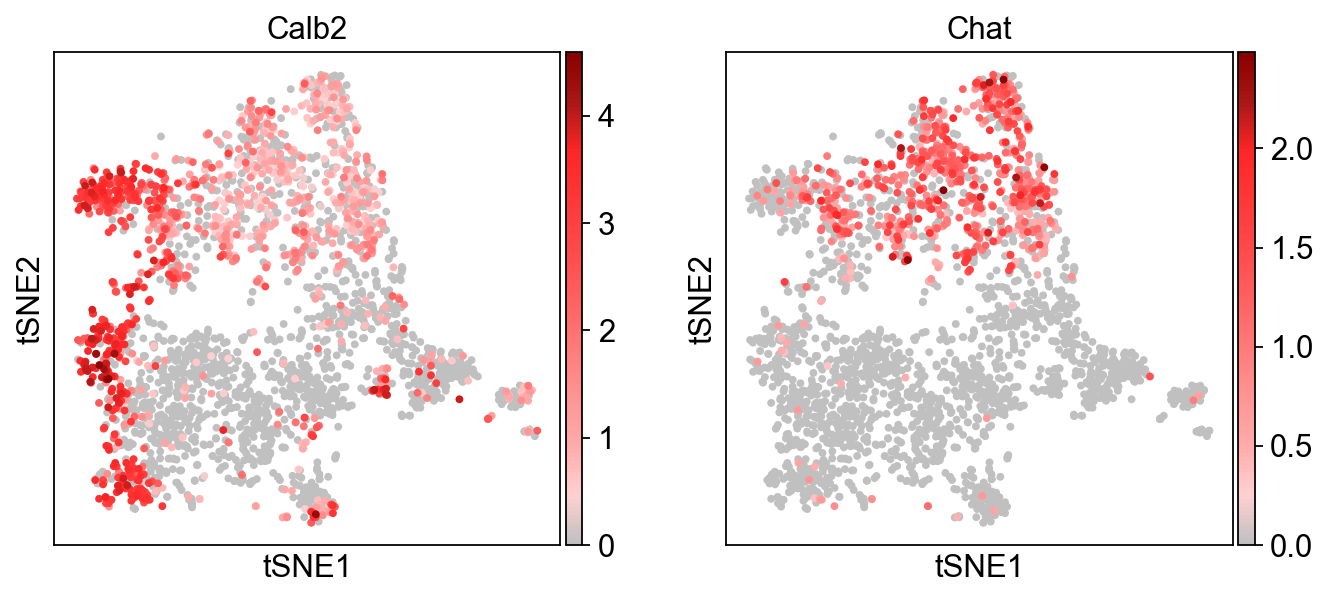

In [9]:
sc.pl.tsne(adata, color= (['Calb2', 'Chat']), cmap=c_cont_red, s=50,  save = 'tsne_Calb2_Chat.pdf') 

In [10]:
scv.tl.recover_dynamics(adata)

recovering dynamics
    finished (0:13:53) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [11]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing neighbors
    finished (0:00:05) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing velocity graph
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing latent time
    finished (0:00:04) --> added 
    'latent_time', shared time (adata.obs)


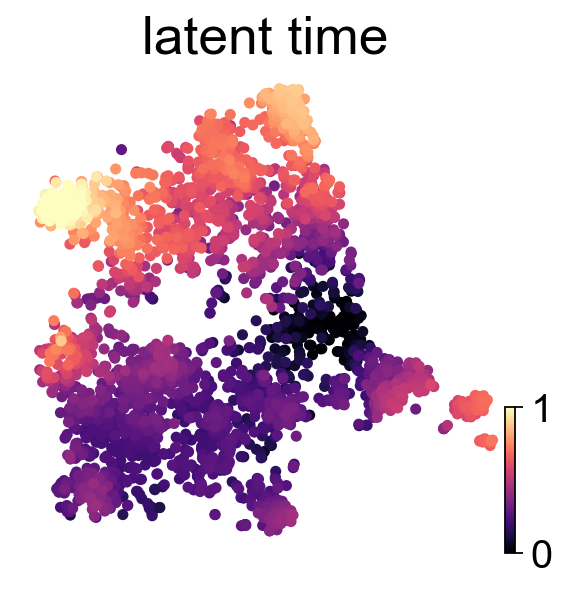

In [13]:
scv.tl.recover_latent_time(adata)

scv.pl.scatter(adata, color='latent_time', basis='tsne', fontsize=24, size=100,
               color_map='magma', perc=[2, 98], colorbar=True, rescale_color=[0,1])

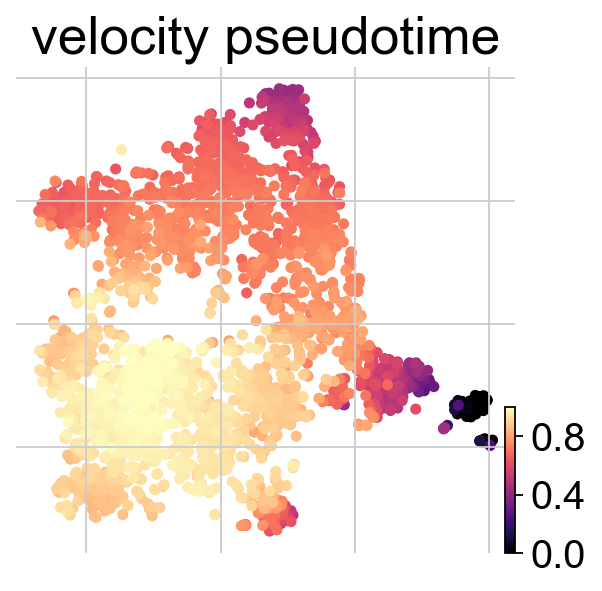

In [10]:
scv.pl.scatter(adata, color='velocity_pseudotime', basis='tsne', fontsize=24, size=100,
               color_map='magma', perc=[2, 98], colorbar=True, rescale_color=[0,1])

In [5]:
marker_genes = ['Vim','Id3', 'Cntn2', 'Chat', 'Calb2']

saving figure to file ../../figures/embryo_Hb/Seurat/scvelo_heatmap_scVELO_pseudotime_markers.pdf


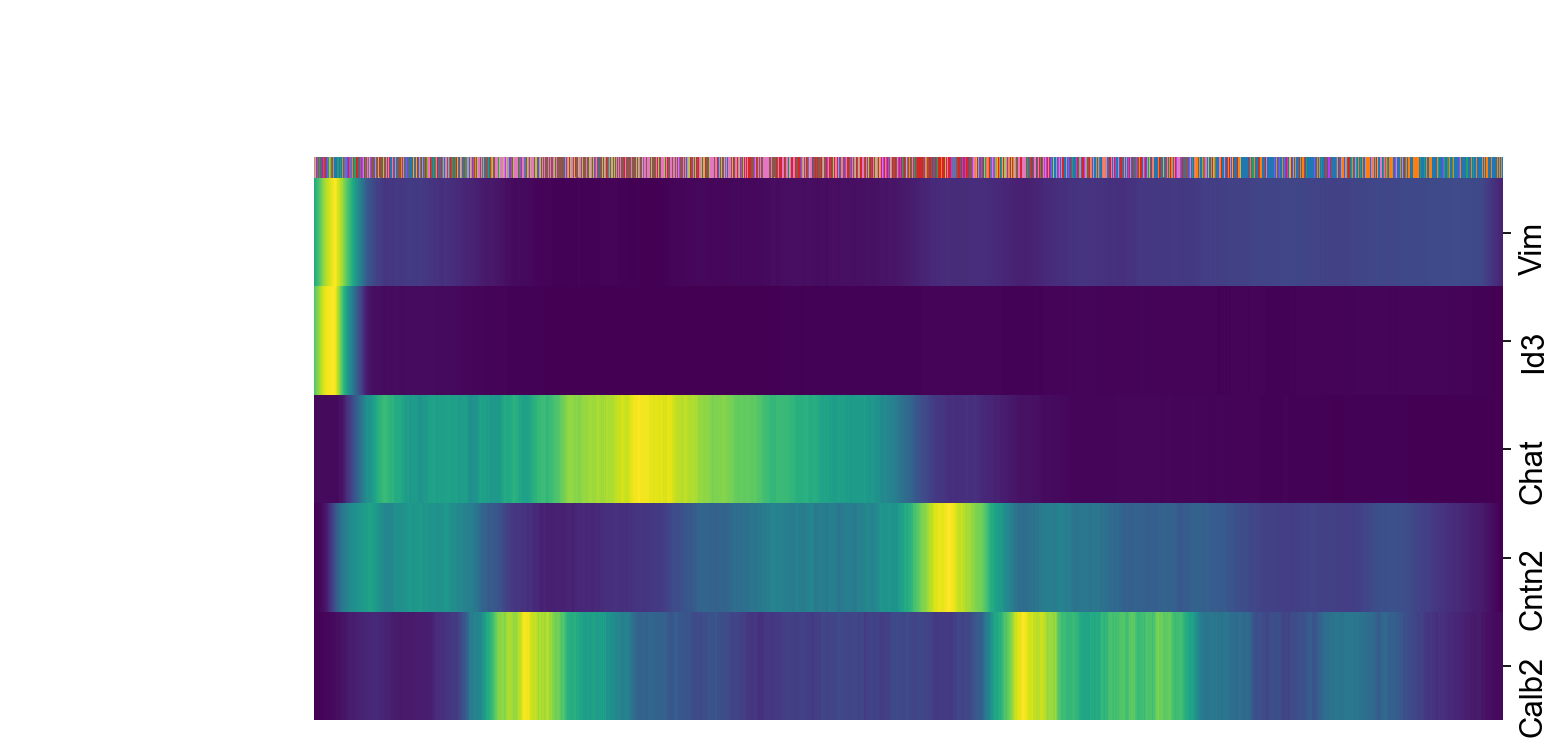

In [12]:
scv.pl.heatmap(adata, var_names=marker_genes, tkey='velocity_pseudotime', n_convolve=100,
               col_color='stage', save='scVELO_pseudotime_markers.pdf')

In [41]:
#adata.write('../../data/output/embryo_Hb/Mar2020_embryo_Hb_Pou4f1_velo_seurat.h5ad')